# Exercises - GEO4902-02 - Data Assimilation

[Save as jupyter notebook, with your name in the filename, and upload on canvas]

# Exercise 02-03 -  Single observation data assimilation experiment

In [1]:
# import python packages
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt
import cartopy as cy
from cmcrameri import cm

/home/maltem/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


#### Load BACKGROUND fields of temperature,wind, and specific humidity

In [2]:
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/remap.varn.BG.nc'
model_background = xr.open_dataset(url)

#### Load ANALYSIS fields of temperature,wind, and specific humidity
#### This analysis has been produced by assimilating a radiosonde information at 500hPa

In [3]:
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/remap.varn.LPB_POS2_TEMP500.nc'
model_analysis = xr.open_dataset(url)

The data is stored in the original coordinates of the model, but do not worry about that. Just assume it is some kind of vertical discretization. Remember that you can look in the metadata to find the variable names and coordinate information! 

### Below are two plotting routines which yo can use to plot horizontal and vertical sections of the model. 

In [4]:
timestep=0; modellevel=59
temp_background = model_background['air_temperature'].isel(time=timestep).sel(lev_2=modellevel)
temp_analysis   = model_analysis['air_temperature'].isel(time=timestep).sel(lev=modellevel)

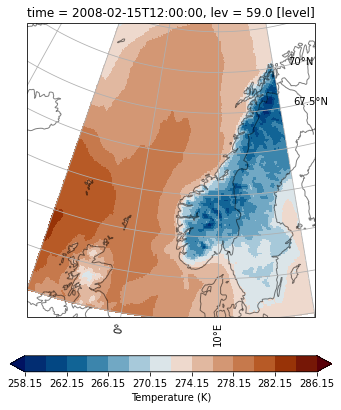

In [5]:
projection = cy.crs.Stereographic(central_latitude=78.4, central_longitude=10.0, )
# projection = cy.crs.PlateCarree()
f, ax = plt.subplots(1,1, subplot_kw={'projection':projection}, figsize=[7.2, 7.2])
# plot cosmetics
ax.set_extent([-10, 20, 55, 72], cy.crs.PlateCarree())
ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
ax.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

temp_analysis.plot.pcolormesh(ax=ax, 
                              x='lon',
                              y='lat',
                              cmap=cm.vik,
                              extend='both',
                              levels=np.arange(258.15, 288.15,2),
                              transform=cy.crs.PlateCarree(), 
                              cbar_kwargs={'orientation':'horizontal','label':'Temperature (K)', 'shrink':0.8, 'pad':0.1})

In [ ]:
timestep=0; seclat=20; # Intersection at latitude model_analysis.lat[seclat]

tempvert_background = model_background['air_temperature'].isel(time=timestep, lat=seclat)
tempvert_analysis   = model_analysis['air_temperature'].isel(time=timestep, lat=seclat)

windvert_background =(np.sqrt(model_background['x_wind']**2 + model_background['y_wind']**2)).isel(time=timestep, lat=seclat)
windvert_analysis   =(np.sqrt(model_analysis['x_wind']**2 + model_analysis['y_wind']**2)).isel(time=timestep, lat=seclat)

humidvert_background = model_background['specific_humidity'].isel(time=timestep, lat=seclat)
humidvert_analysis   = model_analysis['specific_humidity'].isel(time=timestep, lat=seclat)

In [ ]:
f, ax = plt.subplots(1,1,figsize=[7.2, 7.2])

tempvert_background.plot(ax=ax, 
                         x='lon', 
                         y='lev_2', 
                         cmap=cm.vik, 
                         extend='both', 
                         levels=np.arange(253.15, 293.15,2),
                         cbar_kwargs={'orientation':'horizontal','label':'Temperature (K)', 'shrink':1, 'pad':0.1})
ax.set_ylim(ax.get_ylim()[::-1])
